In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [2]:
#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Conv2D(64, kernel_size= 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 199ms/step - accuracy: 0.2921 - loss: 1.9074 - val_accuracy: 0.4992 - val_loss: 1.3984
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - accuracy: 0.5234 - loss: 1.3317 - val_accuracy: 0.5649 - val_loss: 1.2395
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 157ms/step - accuracy: 0.5880 - loss: 1.1540 - val_accuracy: 0.6114 - val_loss: 1.1056
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 157ms/step - accuracy: 0.6370 - loss: 1.0345 - val_accuracy: 0.6398 - val_loss: 1.0393
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 158ms/step - accuracy: 0.6671 - loss: 0.9516 - val_accuracy: 0.6478 - val_loss: 1.0172
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.6883 - loss: 0.8895 - val_accuracy: 0.6535 - val_loss: 0.9958
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.7184 - loss: 0.8134 - val_accuracy: 0.6773 - val_loss: 0.9304
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - accuracy: 0.7302 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - 10ms/step - accuracy: 0.7112 - loss: 1.0111

Test accuracy: 0.7111999988555908


In [ ]:
predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


3

In [ ]:
print(history.history.keys())
print(model.summary())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 579,104 (2.21 MB)

 Trainable params: 193,034 (754.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 386,070 (1.47 MB)

None


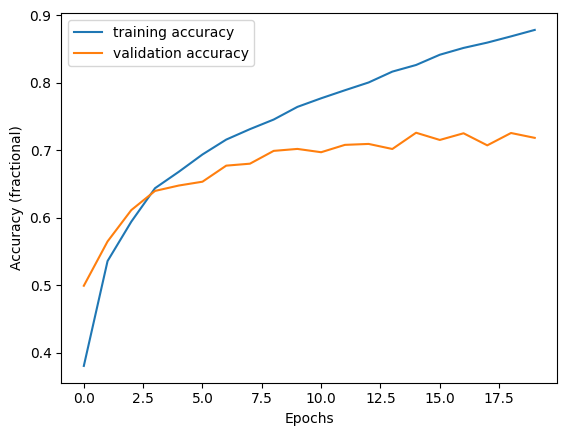

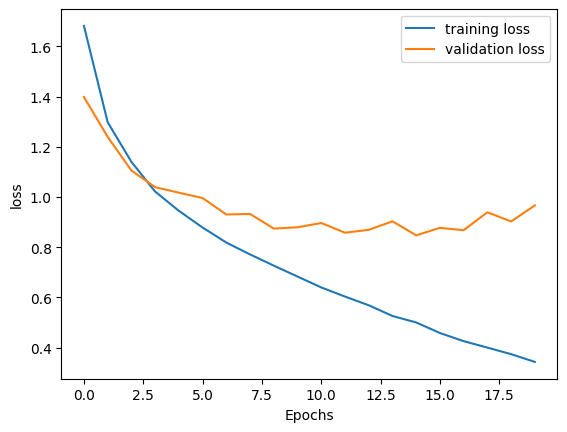

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.1315 - loss: 2.4512 - val_accuracy: 0.2366 - val_loss: 1.9432
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.2855 - loss: 1.8762 - val_accuracy: 0.3651 - val_loss: 1.7785
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3905 - loss: 1.6833 - val_accuracy: 0.4648 - val_loss: 1.5293
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4377 - loss: 1.5827 - val_accuracy: 0.4886 - val_loss: 1.4558
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4761 - loss: 1.4979 - val_accuracy: 0.5116 - val_loss: 1.4142
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4906 - loss: 1.4617 - val_accuracy: 0.5538 - val_loss: 1.3201
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5207 - loss: 1.3855 - val_accuracy: 0.5190 - val_loss: 1.3559
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5443 - loss: 1.3465 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 5, 5, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,166,400 (12.08 MB)

 Trainable params: 1,055,466 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,110,934 (8.05 MB)

None


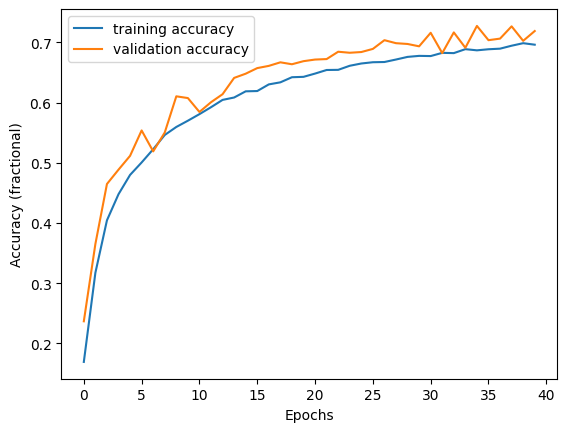

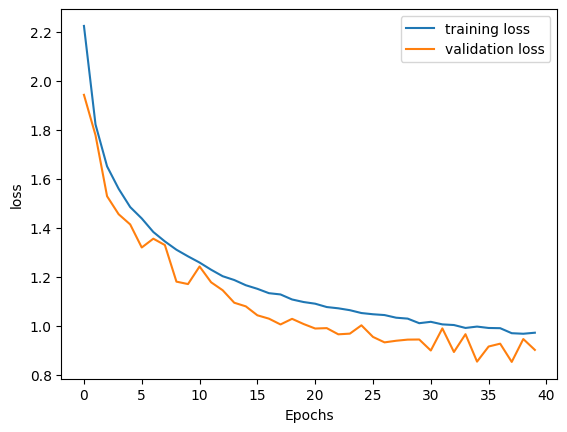

In [3]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Conv3D
from keras import regularizers

#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)


#create ANN model
#model constants
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = Sequential()
model.add(Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(96, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(512, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(10, activation = 'softmax'))

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(x_train, y_train, batch_size = 128, epochs=40, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')
